In [82]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [33]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.describe()
(data['SkinThickness'] == 0 ).sum()

227

###
Too many invalid zero -> imputing instead of drop

In [35]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN, inplace= True)

In [36]:
print(data.isnull().sum())
data.head()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


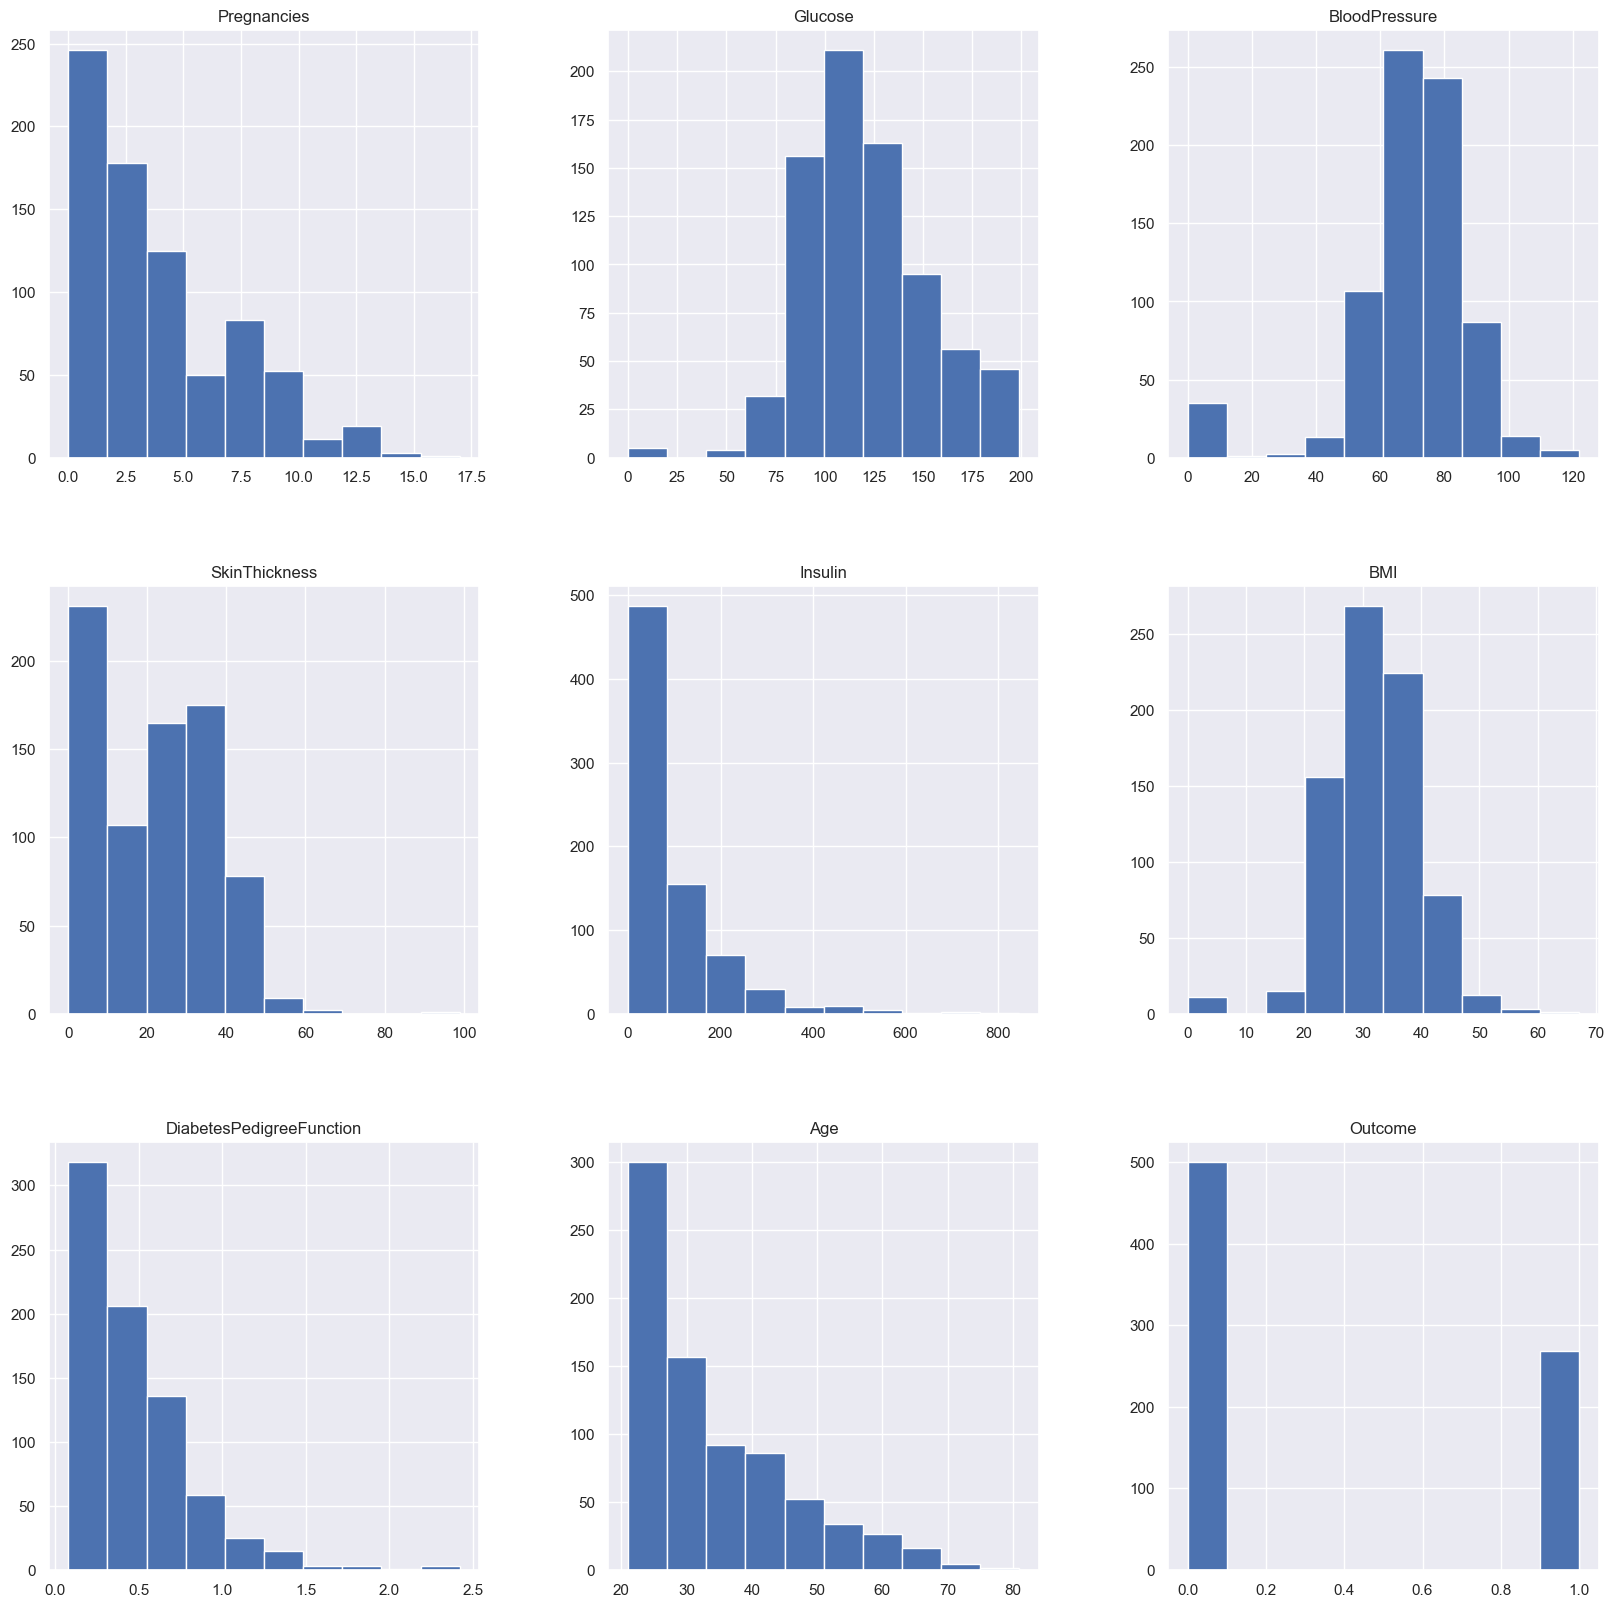

In [37]:
p = data.hist(figsize = (20,20))


In [38]:
for col in data:
    data[col].fillna(data[col].median(), inplace = True)

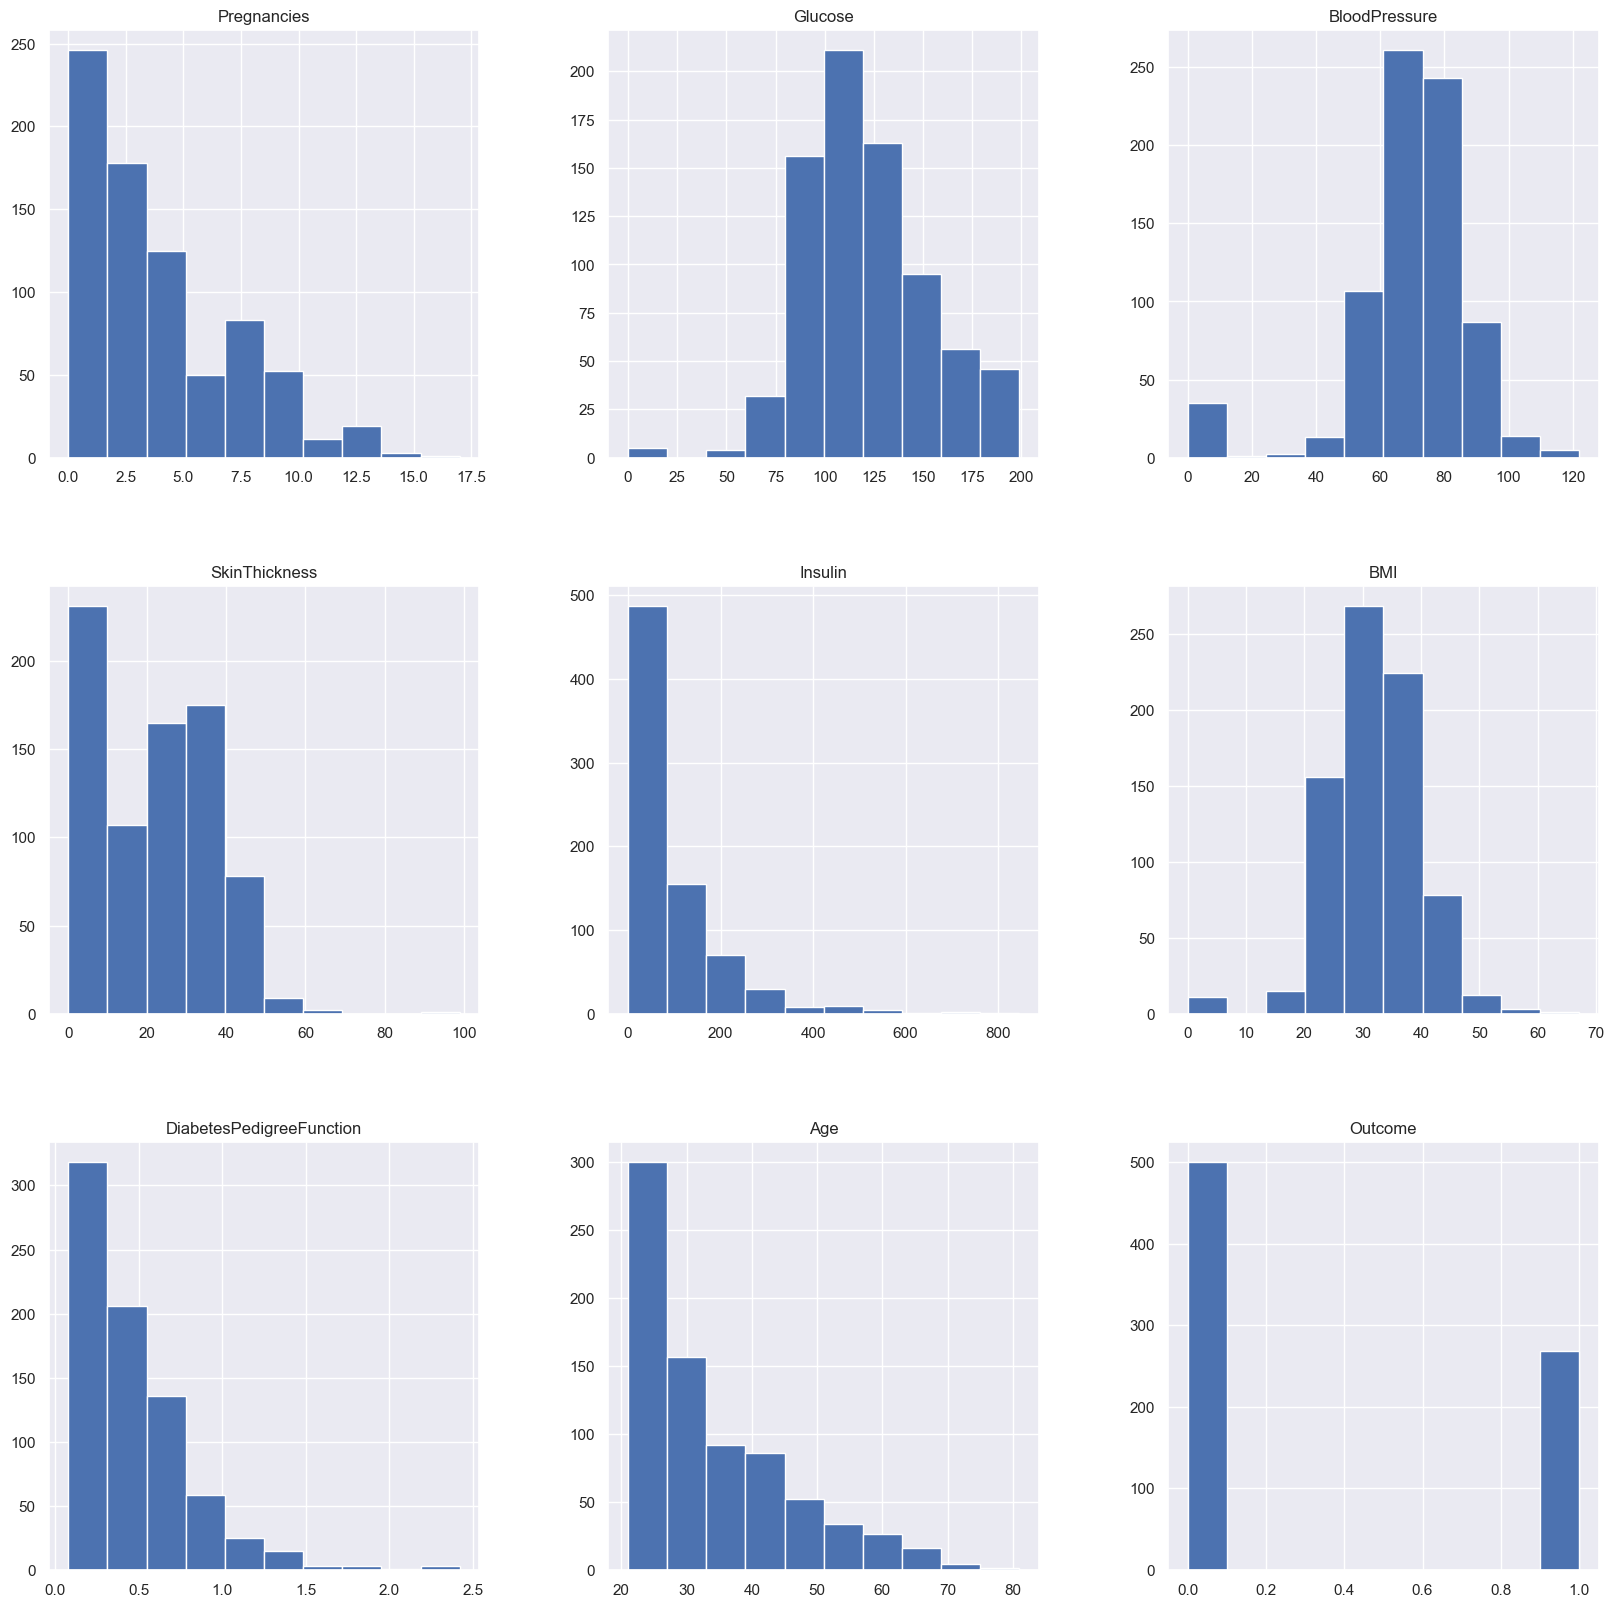

In [39]:
p = data.hist(figsize = (20,20))

In [40]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [41]:
y = data.copy()["Outcome"]
X = data.copy().drop("Outcome", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
def evaluate_model(Y_pred, Y_test):
  # print(confusion_matrix(Y_test, Y_pred))
  acc = accuracy_score(Y_test, Y_pred)
  pre = precision_score(Y_test, Y_pred)
  rec = recall_score(Y_test, Y_pred)
  f1 = f1_score(Y_test, Y_pred, pos_label=1)
  roc_auc = roc_auc_score(Y_test, Y_pred)
  return acc, pre, rec, f1, roc_auc

In [50]:
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

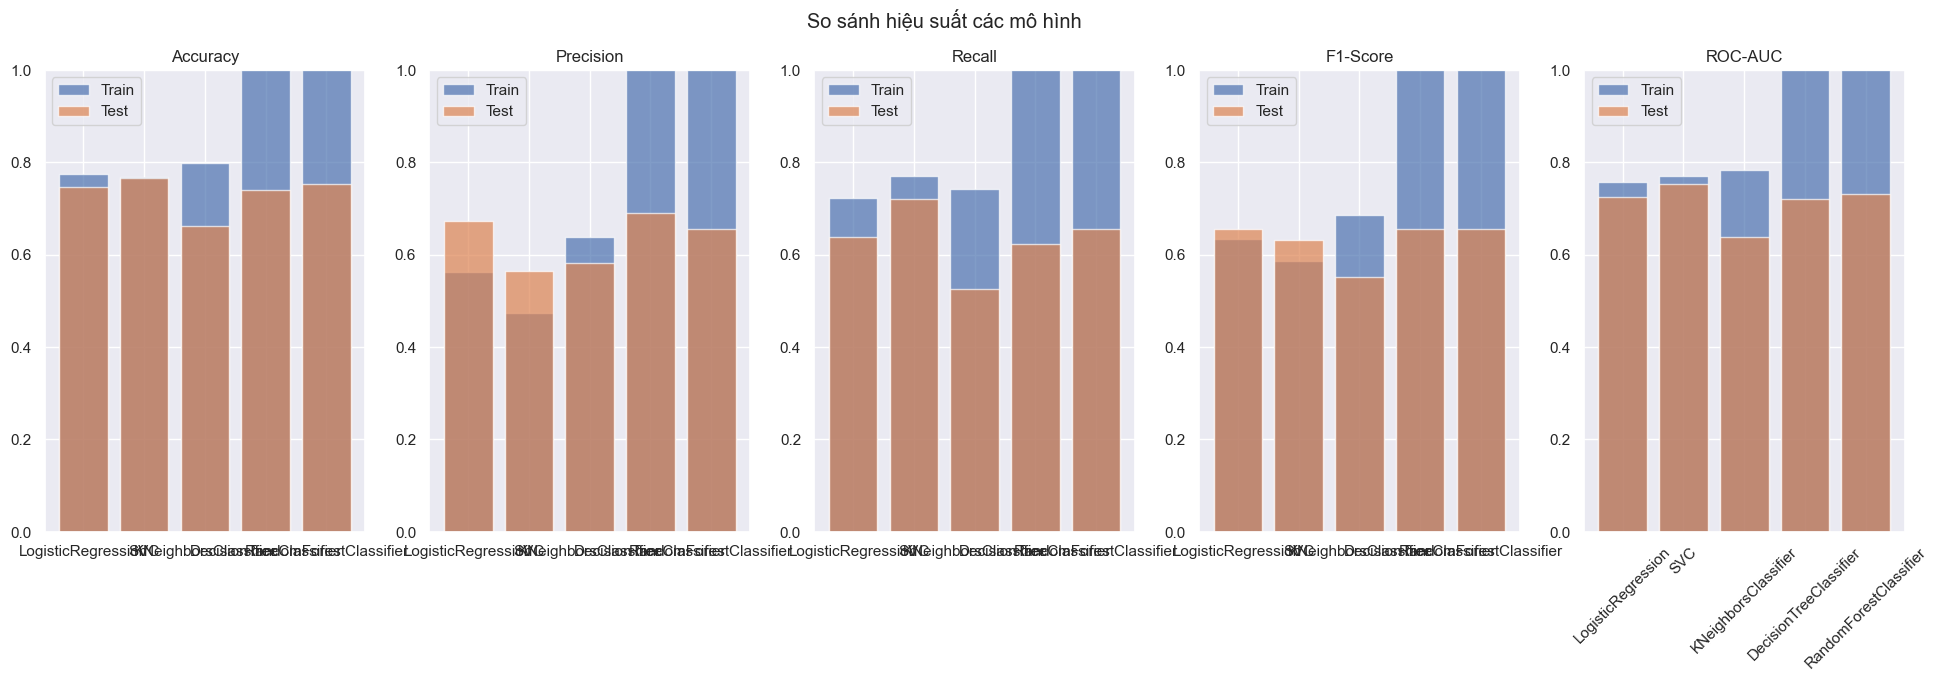

[[0.77361564 0.56338028 0.72289157 0.63324538 0.75765114]
 [0.76872964 0.4741784  0.77099237 0.5872093  0.76955415]
 [0.7980456  0.63849765 0.7431694  0.68686869 0.78225755]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]
[[0.74675325 0.67272727 0.63793103 0.65486726 0.72521552]
 [0.76623377 0.56363636 0.72093023 0.63265306 0.75235701]
 [0.66233766 0.58181818 0.52459016 0.55172414 0.63863917]
 [0.74025974 0.69090909 0.62295082 0.65517241 0.72007756]
 [0.75324675 0.65454545 0.65454545 0.65454545 0.73131313]]


In [51]:
import numpy as np
import matplotlib.pyplot as plt

def evaluating(models):
    train_results = []
    test_results = []
    
    # Lấy tên mô hình từ danh sách models
    model_names = [type(model).__name__ for model in models]
    metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

    for model in models:
        model.fit(X_train, y_train)
        train_results.append(evaluate_model(y_train, model.predict(X_train)))
        test_results.append(evaluate_model(y_test, model.predict(X_test)))

    train_results = np.array(train_results)
    test_results = np.array(test_results)

    fig, axes = plt.subplots(1, len(metrics), figsize=(24, 6))

    for i, metric in enumerate(metrics):
        axes[i].bar(model_names, train_results[:, i], label="Train", alpha=0.7)
        axes[i].bar(model_names, test_results[:, i], label="Test", alpha=0.7)
        axes[i].set_title(metric)
        axes[i].set_ylim(0, 1)
        axes[i].legend()

    plt.suptitle("So sánh hiệu suất các mô hình")
    plt.xticks(rotation=45)
    plt.show()

    return train_results, test_results

train_results, test_results = evaluating(models)
print(train_results)
print(test_results)


### 
Các mô hình cây có vẻ overfit, điểm recall các mô hình nhìn chung không cao, cần scaling và reguralization.

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(KNeighborsClassifier(),param_grid)
knn_cv.fit(X,y)

knn_cv.best_params_

{'n_neighbors': 14}

In [53]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'class_weight': ['balanced', 'balanced_subsample']  # Handle imbalance
}

CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1, scoring=make_scorer(recall_score),verbose=2)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


{'class_weight': 'balanced_subsample',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

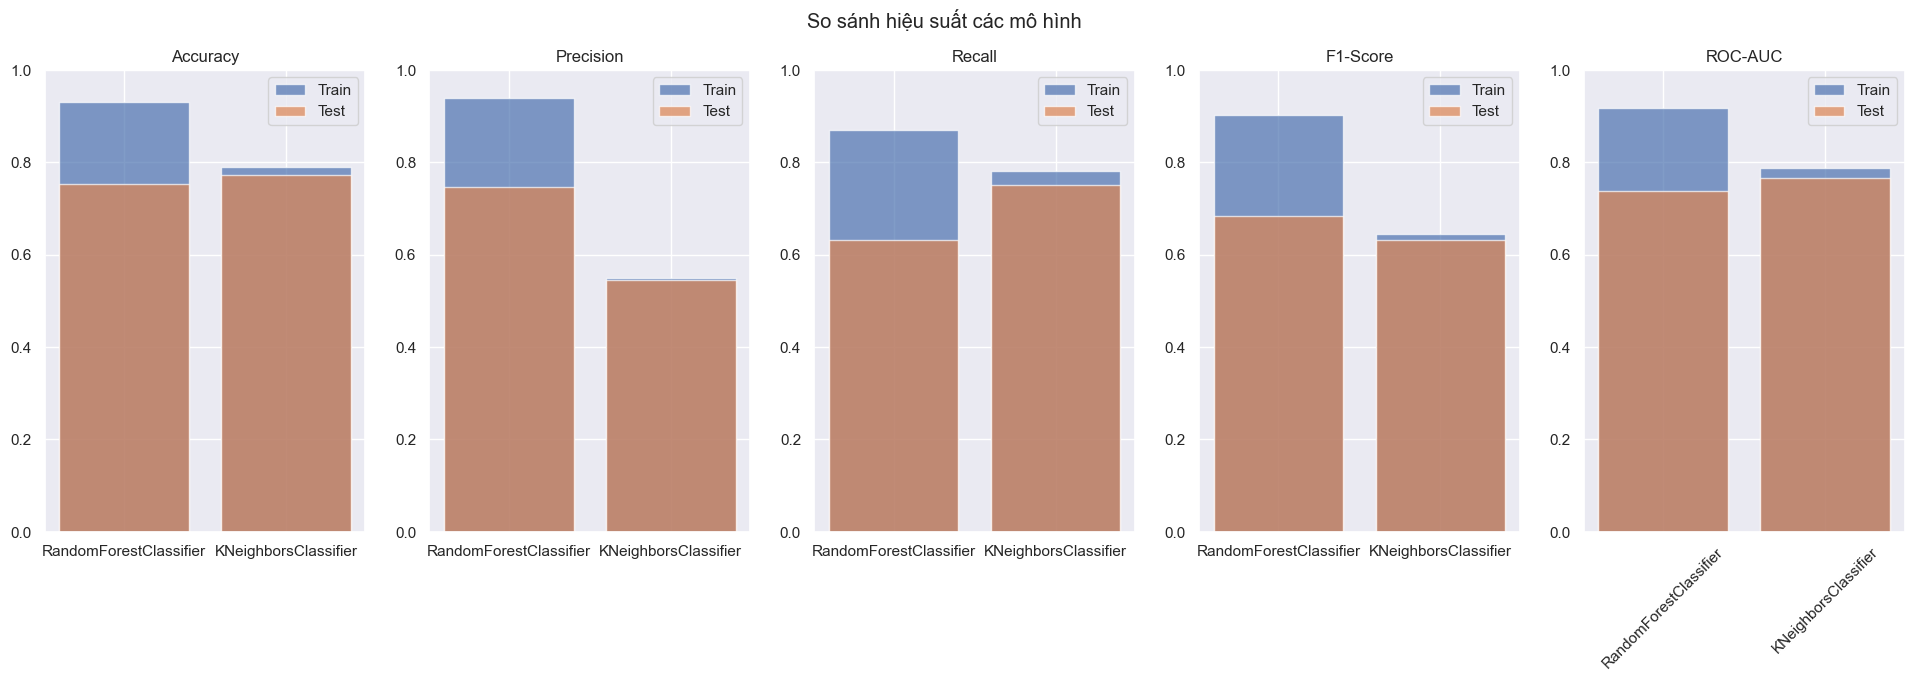

[[0.92996743 0.93896714 0.86956522 0.90293454 0.91785553]
 [0.78990228 0.54929577 0.78       0.6446281  0.78655172]]
[[0.75324675 0.74545455 0.63076923 0.68333333 0.73673293]
 [0.77272727 0.54545455 0.75       0.63157895 0.76535088]]


In [52]:
models = [RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=10, criterion='gini', min_samples_leaf = 4, min_samples_split = 5, class_weight='balanced_subsample'),
          KNeighborsClassifier(n_neighbors=14, n_jobs=-1)]
train_results, test_results = evaluating(models)
print(train_results)
print(test_results)

In [85]:
from scipy.stats import uniform

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None], 
    'solver': ['liblinear', 'saga'] 
}
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2', None] 
}
param_dist_svc = {
    'C': uniform(0.1, 100),
    'kernel': ['linear'],  
    'gamma': ['auto'] 
}

random_search_svc = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist_svc,
    n_iter=10,  
    cv=3,  
    verbose=1,
    n_jobs = -1,
    random_state=42
)

grid_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, n_jobs=-1)
grid_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid_dtree, cv=5, n_jobs=-1)

grid_logreg.fit(X_train, y_train)
grid_dtree.fit(X_train, y_train)
random_search_svc.fit(X_train, y_train)

print("Best Logistic Regression:", grid_logreg.best_params_)
print("Best Decision Tree:", grid_dtree.best_params_)
print("Best SVC:", random_search_svc.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best SVC: {'C': 15.701864044243651, 'gamma': 'auto', 'kernel': 'linear'}
